In [3]:
# Load libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [4]:
# Load data set of world development indicators
data = pd.read_csv('./world-development-indicators/Indicators.csv')
data.shape

(5656458, 6)

In [5]:
data.head(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
5,Arab World,ARB,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,5.380000e+08
6,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,4.769789e+01
7,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,5.956399e+04
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,6.439635e-01
9,Arab World,ARB,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1960,5.041292e+00


In [6]:
# How many years of data do we have?
years = data['Year'].unique().tolist()
len(years)

56

In [7]:
# What is the range of years?
min(years)," to ", max(years)

(1960, ' to ', 2015)

In [8]:
# Unique countries in the list
countries = data.CountryName.unique().tolist()
len(countries)

247

In [9]:
# Unique country codes matches the number of unique countries
countryCodes = data.CountryCode.unique().tolist()
len(countries)

247

In [10]:
# creating a df just for unique countries and the corresponding country code
countryIndex = pd.DataFrame(list(zip(countries, countryCodes)), columns=['country','countryCodes'])
len(countryIndex)

247

In [11]:
countryIndex.head()

,country,countryCodes
0,Arab World,ARB
1,Caribbean small states,CSS
2,Central Europe and the Baltics,CEB
3,East Asia & Pacific (all income levels),EAS
4,East Asia & Pacific (developing only),EAP


In [12]:
# find country codes for developing nations (BRICs) nations,
countryIndex.loc[countryIndex['country'].isin(['Brazil', 'Russian Federation', 'India', 'China'])]

,country,countryCodes
59,Brazil,BRA
73,China,CHN
119,India,IND
190,Russian Federation,RUS


In [13]:
# find country codes for developed nations
countryIndex.loc[countryIndex['country'].isin(['United States', 'Japan', 'Germany', 'United Kingdom'])]

,country,countryCodes
104,Germany,DEU
128,Japan,JPN
235,United Kingdom,GBR
236,United States,USA


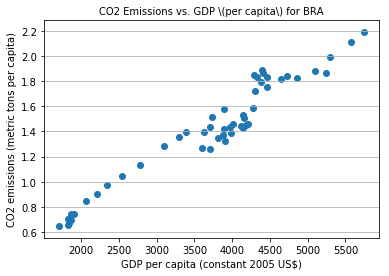

[[1.         0.97136744]
 [0.97136744 1.        ]]


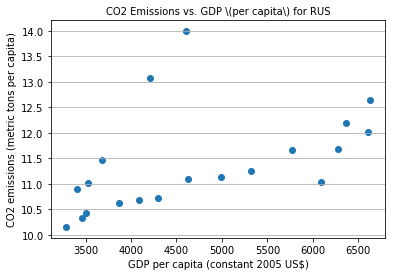

[[1.         0.47752184]
 [0.47752184 1.        ]]


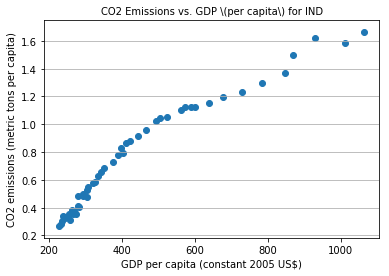

[[1.         0.96753758]
 [0.96753758 1.        ]]


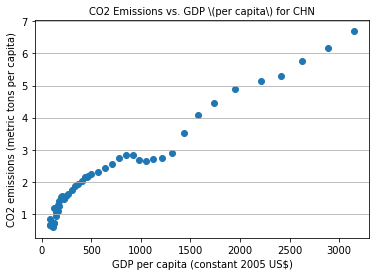

[[1.         0.98021664]
 [0.98021664 1.        ]]


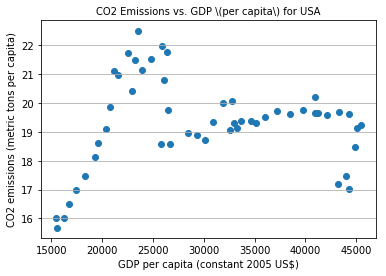

[[1.         0.07676005]
 [0.07676005 1.        ]]


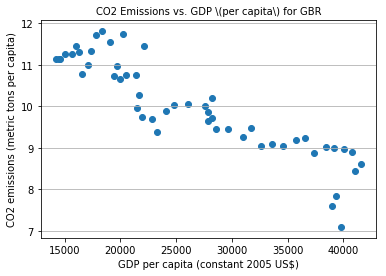

[[ 1.         -0.90339518]
 [-0.90339518  1.        ]]


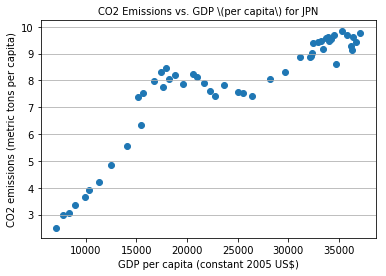

[[1.         0.88707396]
 [0.88707396 1.        ]]


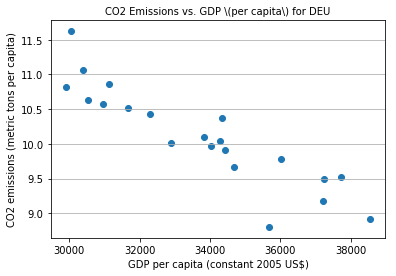

[[ 1.         -0.90512893]
 [-0.90512893  1.        ]]


In [17]:
# Relationship between GPD and CO2 emissions in Brazil, Russian Federation, India, and China.
countryList = ('BRA', 'RUS', 'IND', 'CHN', 'USA', 'GBR', 'JPN', 'DEU')

for i in countryList:
    
    hist_country = i
    
    hist_indicator = 'CO2 emissions \(metric'
    mask1 = data['IndicatorName'].str.contains(hist_indicator)
    mask2 = data['CountryCode'].str.contains(hist_country)
    co2_stage = data[mask1 & mask2]
    
    hist_indicator = 'GDP per capita \(constant 2005'
    mask1 = data.IndicatorName.str.contains(hist_indicator)
    mask2 = data.CountryCode.str.contains(hist_country)
    gdp_stage = data[mask1 & mask2]
    
    merged_df = gdp_stage.merge(co2_stage, how = 'inner', on = ['Year'])
    
    fig, axis = plt.subplots()

    axis.yaxis.grid(True)
    axis.set_title('CO2 Emissions vs. GDP \(per capita\) for ' + i, fontsize=10)
    axis.set_xlabel(gdp_stage.IndicatorName.iloc[0], fontsize=10)
    axis.set_ylabel(co2_stage.IndicatorName.iloc[0], fontsize=10)

    X = merged_df.Value_x
    Y = merged_df.Value_y

    axis.scatter(X, Y)
    plt.show()

    print(np.corrcoef(merged_df.Value_x, merged_df.Value_y))
